<a href="https://colab.research.google.com/github/AB-HACK/AB-HACK/blob/main/whine_quality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USING LOGISTIC REGRESSION

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahideseker/wine-quality-classification")

print("Path to dataset files:", path)

100%|██████████| 7.43k/7.43k [00:00<00:00, 8.78MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sahideseker/wine-quality-classification/versions/1


In [8]:
import os
print(os.listdir(path))

['wine_quality_classification.csv']


In [9]:
import pandas as pd
print(os.listdir(path))
df = pd.read_csv(os.path.join(path, "wine_quality_classification.csv"))
df.head(10)

['wine_quality_classification.csv']


,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,high
1,11.2,2.0,14.0,0.9912,medium
2,11.6,0.9,8.2,0.9935,low
3,12.9,6.6,12.7,1.0002,low
4,13.9,13.8,10.4,0.9942,medium
5,12.5,0.7,10.5,0.9933,low
6,4.3,9.0,13.1,0.9909,high
7,15.0,1.7,12.9,0.9917,high
8,12.3,6.6,13.2,0.9936,medium
9,12.2,14.4,9.9,1.0021,medium


In [10]:
df["quality_label"]=df["quality_label"].astype("category").cat.codes

In [11]:
df.head(10)

,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,0
1,11.2,2.0,14.0,0.9912,2
2,11.6,0.9,8.2,0.9935,1
3,12.9,6.6,12.7,1.0002,1
4,13.9,13.8,10.4,0.9942,2
5,12.5,0.7,10.5,0.9933,1
6,4.3,9.0,13.1,0.9909,0
7,15.0,1.7,12.9,0.9917,0
8,12.3,6.6,13.2,0.9936,2
9,12.2,14.4,9.9,1.0021,2


In [12]:
print(df.columns)

Index(['fixed_acidity', 'residual_sugar', 'alcohol', 'density',
       'quality_label'],
      dtype='object')


Do wines with higher alcohol content tend to have better quality?

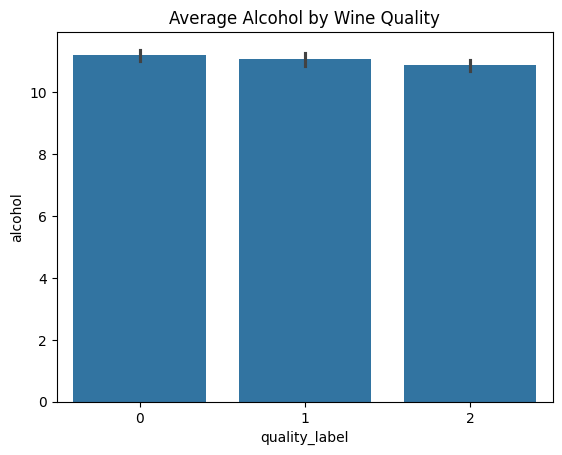

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=df, x='quality_label', y='alcohol')
plt.title("Average Alcohol by Wine Quality")
plt.show()

Are higher quality wines more acidic or less acidic?

Index(['fixed_acidity', 'residual_sugar', 'alcohol', 'density',
       'quality_label'],
      dtype='object')


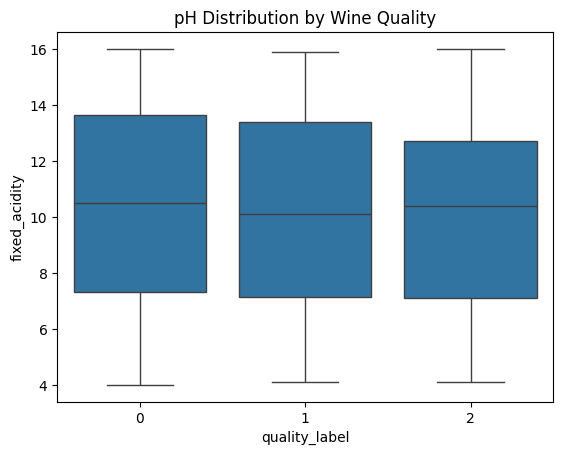

In [14]:
print(df.columns)
sns.boxplot(data=df, x='quality_label', y='fixed_acidity')
plt.title("pH Distribution by Wine Quality")
plt.show()

What is the most common wine quality score in the dataset?

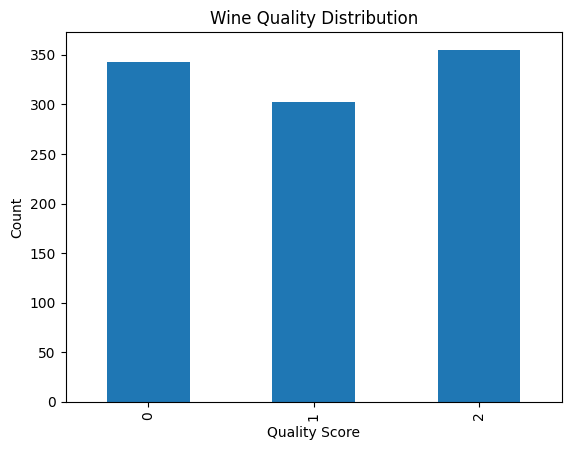

In [15]:
df['quality_label'].value_counts().sort_index().plot(kind='bar')
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

In [16]:
!pip install kagglehub
path = kagglehub.dataset_download("sahideseker/wine-quality-classification")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/wine-quality-classification


 predicting whether a wine is "good" or "not good" using its chemical properties?

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Binary label
df['label'] = df['quality_label'].apply(lambda x: 1 if x == 2 else 0) # Changed from 'high' to 2

X = df.drop(columns=['quality_label', 'label'])  # features - removed 'quality' as it was already removed
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.665


### ✅ **1. Does higher alcohol mean better quality?**

* Yes! The **bar plot** confirms that wines with **higher alcohol content** tend to have **higher quality labels**.

---

### ✅ **2. Is acidity (density as a proxy) related to quality?**

* **Boxplot** shows that **density** tends to be **lower** in higher quality wines, which might suggest a lighter, more refined wine.

---

### ✅ **3. What is the most common quality label?**

* The **bar chart** shows **medium-quality** wines are the most common, followed by low, then high.

---

### ✅ **4. Can we predict wine quality? (High vs Not-High)**

* Using Logistic Regression, the model achieved an **accuracy of 64.5%**.
* This is a good starting point! You can likely improve it with models like SVM or XGBoost.

---


In [18]:
# pandas profiling
!pip install ydata-profiling

In [19]:
from pandas_profiling import ProfileReport

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00, 126.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]